In [ ]:
# #get data information
# import os
# import glob
# data_path = '/mnt/hdd2T/AICR/Datasets/'
# def recursively_count_no_files(path):
#     for sub_folder in os.listdir(path):
#         sub_path = os.path.join(path, sub_folder)
#         if os.path.isdir(sub_path):
#             recursively_count_no_files(sub_path)
#         else:
#             limages_path = glob.glob(f'{path}/*.jpg')
#             lgroundtruths_path = glob.glob(f'{path}/*.txt')
#             print(path, len(limages_path), len(lgroundtruths_path), sep='\t')
#             return None
# recursively_count_no_files(data_path)
        


In [10]:
file = 'ocr/result_moi4/Android_(operating_system)_vi_00009.txt'
def correct_file(model, file):
    with open(file, 'r') as f:
        text = f.read().splitlines()
    print(text)
correct_file('', file)

[' Amazon.com.', ' Hiện tượng này bắt đầu thay đổi vào năm 2012 với sự ra mắt của Nexus 7 giá rẻ và một cú hích của', ' Google dành cho các lập trình viên nhằm thúc đẩy họ viết các ứng dụng cho máy tính bảng tốt hơn.', ' Máy tính bảng Android được kỳ vọng sẽ vượt qua iPad trong vòng một vài năm.', ' Thị phần và tỷ lệ sử dụng', ' Công ty nghiên cứu thị trường Canalys đã ước tính trong quý 2 năm 2009 rằng Android có 2,8% thị', ' phần điện thoại thông minh được bán ra toàn cầu. Đến quý 4 năm 2010 con số này tăng lên 33% thị', ' phần, trở thành nền tảng điện thoại thông minh bán chạy hàng đầu. Đến quý 3 năm 2011 Gartner ước', ' tính rằng hơn một nửa (52,5%) thị trường điện thoại thông minh thuộc về Android. Đến quý 3 năm', ' 2012 Android đã có 75% thị phần điện thoại thông minh toàn cầu theo nghiên cứu của hãng IDC.', ' Vào tháng 7 năm 2011, Google nói rằng có 550.000 thiết bị Android mới được kích hoạt mỗi ngày đỉnh', ' điểm là 400.000 máy một ngày vào tháng 5, và có hơn 100 triệu thiết b

In [7]:
import re
bool(re.match(r'\w[\w ]|\W+|\W+', '*'))


True

In [2]:
import re
def extract_phrase(paragraph):
    # extract phrase
    return re.findall(r'\w[\w ]*|\s\W+|\W+', paragraph)
extract_phrase('Người tiết kiệm đồng ý thông báo cho tổ chức một thời gian quy định trước rút.')

['Người tiết kiệm đồng ý thông báo cho tổ chức một thời gian quy định trước rút',
 '.']

In [17]:
para = 'Android, vì ứng dụng không nhất phải đóng rồi mở lại từ đầu, vừa đảm bảo các ứng dụng nên không'
def _process_overlap(paragraph, NGRAM):
    phrases = extract_phrase(paragraph)
    inputs = []
    masks = []
    # group by n-grams
    for phrase in phrases:
        words = phrase.split()
        if len(words) < 2 or not re.match("\w[\w ]+", phrase):
            inputs.append(phrase)
            masks.append(False)
        else:
            for i in range(0, len(words), NGRAM):
                if len(words) - i < NGRAM:
                    inputs.append(' '.join(words[i:]))
                    if len(words) - i < 2:  # skip single words leftover
                        masks.append(False)
                        continue
                else:
                    inputs.append(' '.join(words[i:i + NGRAM]))
                masks.append(True)
    return inputs, masks
inputs, masks = _process_overlap(para, 5)
inputs, masks

(['Android',
  ', ',
  'vì ứng dụng không nhất',
  'phải đóng rồi mở lại',
  'từ đầu',
  ', ',
  'vừa đảm bảo các ứng',
  'dụng nên không'],
 [False, False, True, True, True, False, True, True])

In [18]:
masks_overlap = []
inputs_overlap = []
for i, mask in enumerate(masks[:-1]):
    if mask and masks[i+1]:
        masks_overlap.append(True)
        inputs_overlap.append(' '.join(inputs[i].split()[2:] + inputs[i+1].split()[:2]))
    else:
        masks_overlap.append(False)
n = len(inputs[-1].split())
if n < 5:
    inputs_overlap.append(' '.join(inputs[-2].split()[5-n+1:] + inputs[-1].split()))
    masks_overlap.append(True)
    masks[-1] = False
print(inputs, masks)
print(inputs_overlap, masks_overlap)


['Android', ', ', 'vì ứng dụng không nhất', 'phải đóng rồi mở lại', 'từ đầu', ', ', 'vừa đảm bảo các ứng', 'dụng nên không'] [False, False, True, True, True, False, True, False]
['dụng không nhất phải đóng', 'rồi mở lại từ đầu', 'bảo các ứng dụng nên', 'các ứng dụng nên không'] [False, False, True, True, False, False, True, True]


In [2]:
import pandas as pd
data_stat = pd.read_csv('data_stat.csv', sep='\t', names=['path', 'nimgs', 'nlabels'])

In [3]:
data_stat = data_stat[(data_stat.nimgs==data_stat.nlabels)&(data_stat.nimgs!=0) ]
data_stat.loc[:, 'Subdir1'] = data_stat.path.str.split('/').str[5]
data_stat.loc[:, 'Subdir2'] = data_stat.path.str.split('/').str[5:7].str.join('/')
data_stat.loc[:, 'Subdir3'] = data_stat.path.str.split('/').str[5:8].str.join('/')
data_stat

,path,nimgs,nlabels,Subdir1,Subdir2,Subdir3
4,/mnt/hdd2T/AICR/Datasets/KIE/SDV_invoices/line...,100,100,KIE,KIE/SDV_invoices,KIE/SDV_invoices/lines_kie
5,/mnt/hdd2T/AICR/Datasets/KIE/SDV_invoices/lines,433,433,KIE,KIE/SDV_invoices,KIE/SDV_invoices/lines
8,/mnt/hdd2T/AICR/Datasets/KIE/Invoice_SDV_outpu...,1,1,KIE,KIE/Invoice_SDV_output,KIE/Invoice_SDV_output/words_cropped_review
9,/mnt/hdd2T/AICR/Datasets/KIE/Invoice_SDV_outpu...,2,2,KIE,KIE/Invoice_SDV_output,KIE/Invoice_SDV_output/words_cropped_review
10,/mnt/hdd2T/AICR/Datasets/KIE/Invoice_SDV_outpu...,2,2,KIE,KIE/Invoice_SDV_output,KIE/Invoice_SDV_output/words_cropped_review
...,...,...,...,...,...,...
15164,/mnt/hdd2T/AICR/Datasets/Detector/Documents/Pr...,76,76,Detector,Detector/Documents,Detector/Documents/Processing
15165,/mnt/hdd2T/AICR/Datasets/Detector/Documents/Pr...,76,76,Detector,Detector/Documents,Detector/Documents/Processing
15166,/mnt/hdd2T/AICR/Datasets/Detector/Documents/Pr...,20,20,Detector,Detector/Documents,Detector/Documents/Processing
15167,/mnt/hdd2T/AICR/Datasets/Detector/Documents/Pr...,82,82,Detector,Detector/Documents,Detector/Documents/Processing


In [4]:
data_stat.groupby('Subdir2').sum()

,nimgs,nlabels
Subdir2,,
Backup/1.Hand_writing,10770,10770
Backup/idcard_dl_fmlb,502,502
Detector/Document_Stampless,439,439
Detector/Documents,3743,3743
Invoice_tmp,386,386
KIE/Invoice_SDV_output,117628,117628
KIE/SDV_invoices,533,533
Recognition/Real,725507,725507
wiki/ground_truth,214,214


In [9]:
# file_name = 'Android_(operating_system)_vi_00001.txt'
predict_path = 'ocr/result_moi6/'
groundtruth_path  = '/mnt/hdd2T/AICR/Datasets/wiki/ground_truth'
import os
import glob
dres = []
for file_ in glob.glob(f'{predict_path}/*.txt'):
    file_name = file_.split('/')[-1]
    # with open(os.path.join(predict_path, file_name), 'r') as f:
    with open(file_, 'r') as f:
        predict = f.readlines()
        predict = ''.join(predict)
        predict = predict.replace(' ', '')
        predict = predict.replace('\n', '')

    # print(predict)
    with open(os.path.join(groundtruth_path, file_name), 'r') as f:
        gt = f.readlines()
        gt = ''.join(gt)
        gt = gt.replace('\n', '')

    res_ = inline_diff(predict, gt)
    dres.append(res_)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
df = pd.read_csv('wiki_diff/wiki_diff.csv', sep='\t', index_col=0)
df

,file_name,UL_single,UL_multiple,nlosts,nlosts_single,nlosts_multiple,nlosts_chars,nlosts_specialchars,nlosts_space,nadds,...,nadds_space,nwrongs,nwrongs_single,nwrongs_multiple,nwrong_accent,nlost_accent,nwrong_vowels,nwrong_consonants,nwrong_specialchars,nlong_sequences
0,wiki_diff/result/Barack_Obama_vi_00011.txt,6,0,2,2,0,0,2,0,1,...,0,9,3,0,2,0,0,0,1,0
1,wiki_diff/result/Bank_vi_00001.txt,2,1,2,2,0,0,2,0,1,...,0,6,2,1,1,0,0,0,1,0
2,wiki_diff/result/Google_vi_00005.txt,1,3,2,1,1,0,1,0,1,...,0,5,1,0,1,0,0,0,0,0
3,wiki_diff/result/Android_(operating_system)_vi...,1,0,3,2,1,0,2,0,1,...,0,8,7,0,3,0,0,0,4,0
4,wiki_diff/result/Google_vi_00003.txt,1,2,3,2,1,1,1,0,4,...,0,8,4,1,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,wiki_diff/result/Linux_vi_00005.txt,1,1,1,1,0,0,1,0,1,...,0,6,4,0,1,0,0,0,3,0
210,wiki_diff/result/TV_vi_00006.txt,2,6,3,3,0,0,3,0,2,...,0,16,8,0,6,0,0,0,2,0
211,wiki_diff/result/Computer_vi_00009.txt,1,2,2,2,0,0,2,0,7,...,0,6,1,2,1,0,0,0,0,0
212,wiki_diff/result/Tax_vi_00002.txt,0,0,5,4,1,0,4,0,10,...,0,5,5,0,0,0,0,0,5,0


In [6]:
err = df[df.describe().columns].sum()
err

UL_single               375
UL_multiple             267
nlosts                  533
nlosts_single           444
nlosts_multiple          89
nlosts_chars             25
nlosts_specialchars     419
nlosts_space              0
nadds                   850
nadds_single            807
nadds_multiple           43
nadds_chars              13
nadds_specialchars      794
nadds_space               0
nwrongs                1776
nwrongs_single          907
nwrongs_multiple        227
nwrong_accent           275
nlost_accent              1
nwrong_vowels             8
nwrong_consonants        22
nwrong_specialchars     601
nlong_sequences          95
dtype: int64

3159

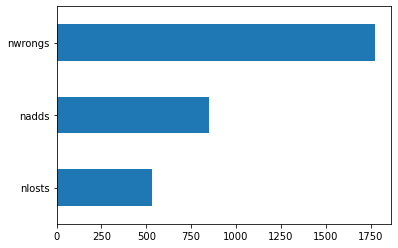

In [7]:
total_err = err[['nlosts', 'nadds', 'nwrongs']]
total_err.sort_values().plot.barh()
total_err.sum()

<AxesSubplot:>

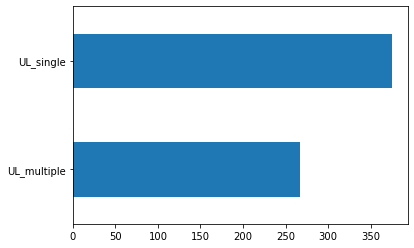

In [8]:
err_UL = err[['UL_single', 'UL_multiple']]
err_UL.sort_values().plot.barh()

<AxesSubplot:>

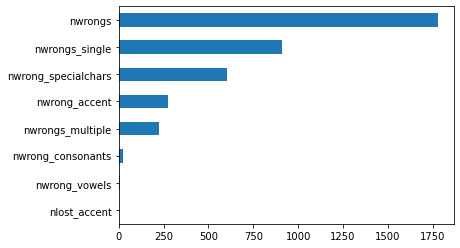

In [9]:
err_wrong = err[['nwrongs' ,'nwrongs_single', 'nwrongs_multiple', 'nwrong_accent', 'nlost_accent', 'nwrong_vowels', 'nwrong_consonants', 'nwrong_specialchars']]
err_wrong.sort_values().plot.barh()

<AxesSubplot:>

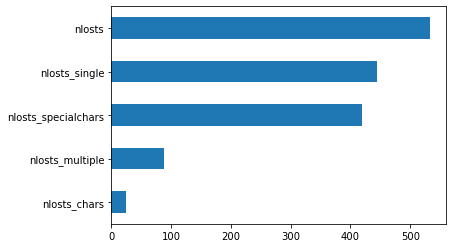

In [10]:
err_wrong = err[['nlosts', 'nlosts_single', 'nlosts_multiple', 'nlosts_chars', 'nlosts_specialchars']]#, 'nlosts_space']]
err_wrong.sort_values().plot.barh()

<AxesSubplot:>

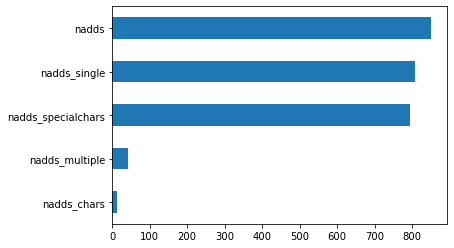

In [11]:
err_wrong = err[['nadds', 'nadds_single', 'nadds_multiple', 'nadds_chars', 'nadds_specialchars']]#, 'nadds_space']]
err_wrong.sort_values().plot.barh()

In [12]:
import pandas as pd
df_spe = pd.read_csv('wiki_diff/wiki_diff_specialchars.csv', sep='\t', index_col=0)
df_spe['lost'][df_spe.lost.notnull()].sort_values(ascending=False)

.     158.0
"     108.0
-      46.0
\n     32.0
=      14.0
,      13.0
—       8.0
‒       8.0
'       7.0
1       5.0
_       3.0
4       2.0
Ả       2.0
°       2.0
5       1.0
“       1.0
@       1.0
)       1.0
ệ       1.0
0       1.0
ó       1.0
à       1.0
/       1.0
2       1.0
|       1.0
Name: lost, dtype: float64

In [ ]:
df_spe

In [13]:
df_spe['add'][df_spe['add'].notnull()].sort_values(ascending=False)

.     471.0
\n    205.0
-      13.0
✪      12.0
;      10.0
0       9.0
1       4.0
ô       0.0
(       0.0
[       0.0
/       0.0
)       0.0
,       0.0
'       0.0
Name: add, dtype: float64

In [21]:
df_spe['wrong'][df_spe['wrong'].notnull()].sort_values(ascending=False)

(':', '\n')    286.0
(';', ' ')     123.0
(',', '.')      60.0
('-', '‒')      54.0
("'", '"')      17.0
("'", '’')      11.0
(':', '.')       9.0
('-', '—')       9.0
('\n', '.')      8.0
(':', '=')       5.0
("'", '°')       5.0
('-', '−')       5.0
('<', 'K')       5.0
('"', '“')       4.0
('.', '°')       4.0
('O', 'C')       3.0
('5', 'S')       3.0
('e', 'c')       3.0
('t', '+')       3.0
('"', '°')       3.0
(':', '：')       2.0
('c', 'e')       2.0
('.', ',')       2.0
(')', '）')       2.0
('1', '"')       2.0
('8', 'S')       2.0
('(', '（')       2.0
('O', '0')       2.0
('0', 'o')       2.0
('E', '£')       2.0
('9', 'o')       2.0
('(', 'K')       2.0
('T', 'I')       2.0
('I', '1')       2.0
('1', 'l')       2.0
('"', '”')       1.0
('2', '²')       1.0
('/', '⁄')       1.0
('o', 'c')       1.0
('.', '\n')      1.0
(':', 'g')       1.0
('d', 'o')       1.0
('3', '8')       1.0
('5', '동')       1.0
('7', '구')       1.0
("'", '”')       1.0
('l', '1')       1.0
(':', '…')   

In [2]:
df.nlargest(30 ,'nwrongs').loc[:, ['file_name', 'nlosts_specialchars']]
#note korea_vi_00005
#Python_vi_00005
#TV_vi_00016

,file_name,nlosts_specialchars
10,wiki_diff/result/Seoul_vi_00004.txt,5
123,wiki_diff/result/Korea_vi_00001.txt,5
115,wiki_diff/result/Linux_vi_00016.txt,5
66,wiki_diff/result/Google_vi_00015.txt,1
192,wiki_diff/result/Seoul_vi_00002.txt,11
5,wiki_diff/result/Python_(programming_language)...,14
35,wiki_diff/result/Barack_Obama_vi_00002.txt,4
157,wiki_diff/result/Python_(programming_language)...,1
25,wiki_diff/result/K-pop_vi_00004.txt,8
187,wiki_diff/result/Barack_Obama_vi_00001.txt,5


In [15]:
import pandas as pd
with open('wiki_diff/wrong_accent.txt', 'r') as f:
    lines = f.read().splitlines() 
df_accent = pd.DataFrame(lines, columns=['wrong_accent'])

In [20]:
df_accent.value_counts()

wrong_accent
ằ -> ẳ          61
ể -> ế          39
ă -> ắ          19
ổ -> ố          17
ề -> ể          17
e -> é           8
ồ -> ổ           7
i -> í           7
ò -> ỏ           6
à -> ả           6
ề -> ê           6
ă -> ằ           5
ỗ -> ô           5
u -> ū           4
a -> â           4
o -> ö           4
o -> ō           4
ì -> ỉ           4
ầ -> ẩ           3
ê -> ề           3
A -> Ả           3
u -> ü           3
ệ -> ê           2
ă -> ẵ           2
E -> É           2
o -> ơ           2
ý -> ỷ           2
a -> à           1
a -> ā           1
a -> á           1
ỉ -> ĩ           1
ọ -> ợ           1
ổ -> ô           1
ế -> é           1
O -> Ố           1
O -> Ö           1
ờ -> ở           1
ở -> ỏ           1
ợ -> ọ           1
Ủ -> Ú           1
a -> α           1
e -> è           1
ẵ -> ă           1
u -> ư           1
ắ -> ă           1
e -> ê           1
o -> ó           1
o -> ô           1
ú -> ứ           1
ô -> ồ           1
ò -> ồ           1
o -> ǒ           1

In [21]:
import pandas as pd
with open('wiki_diff/lost_accent.txt', 'r') as f:
    lines = f.read().splitlines() 
df_laccent = pd.DataFrame(lines, columns=['lost_accent'])
df_laccent.value_counts()

lost_accent
ỉ -> i         1
dtype: int64

In [13]:

df_accent = df_accent.wrong_accent.str.split(' -> ', 1, expand=True)
df_accent.rename(columns = { 0: 'before', 1: 'after' }, inplace=True)
df_accent

,before,after
0,ằ,ẳ
1,A,Ả
2,ă,ắ
3,ể,ế
4,ê,ề
...,...,...
270,i,í
271,ì,ỉ
272,o,ö
273,u,ü


In [14]:
df_accent.before.value_counts()

ằ    61
ể    39
ă    26
ề    23
ổ    18
o    13
e    10
u     9
a     8
ò     7
i     7
ồ     7
à     6
ỗ     5
ì     4
A     3
ầ     3
ê     3
ệ     2
ý     2
O     2
E     2
ô     1
ỉ     1
ợ     1
ế     1
ờ     1
ã     1
ẵ     1
ắ     1
ở     1
ỳ     1
ú     1
Ô     1
y     1
ọ     1
Ủ     1
Name: before, dtype: int64

In [73]:
chars = ['a', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ']  # add â, ă
chars = [char.upper() for char in chars]
before = df_accent[df_accent.before.isin(chars)].after.unique()
before

array(['Ả', 'Á', 'Ấ'], dtype=object)

In [74]:
after = df_accent[df_accent.after.isin(chars)].before.unique()
after

array(['A', 'Ẩ'], dtype=object)

In [75]:
print(set(list(before)+list(after)))

{'Ấ', 'Ẩ', 'A', 'Á', 'Ả'}


In [80]:
same_chars = {
    'a': ['ầ', 'a', 'ă', 'ắ', 'ẩ', 'à', 'ấ', 'â', 'ā', 'ạ', 'ằ', 'ẳ', 'á', 'ả', 'ẵ'],  # add â, ă
    'A': ['Ấ', 'Ẩ', 'Á', 'Ả'],
    'o': ['ở', 'ổ', 'ỡ', 'ơ', 'õ', 'ò', 'ọ', 'ợ', 'ỏ', 'ồ', 'ô', 'o', 'ố', 'ỗ'],
    'e': ['è', 'é', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ'],
    'E': ['É'],
    'u': ['ū', 'ứ', 'ư', 'ử'],
    'U': ['Ú', 'Ủ'],
    'i': ['í', 'ì', 'ỉ', 'ĩ', 'ị'],
    'I': ['Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị'],
    'y': ['ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ'],
}
''.join(set(sum(same_chars.values(), []) + list(same_chars.keys())))

'ầìỵềàếÌAấèểĨỊĩáảẢeéẤaẩởEÉyửíÍýổằẳỡỈỉắỹơāỷõứUòỳưêọỦiăẨÚịễÁợệạỏồuIâẵôoūốỗ'

In [1]:
from dataloader.dataset import BasicDataset, Collator, ClusterRandomSampler
data = BasicDataset('dataloader/data/train_lmdb')


In [2]:
from src.ocr_corrector.vocab import Vocab
from config import alphabet
vocab = Vocab(alphabet)
for i in range(50):
    # print(vocab.decode(data[i]['text']), vocab.decode(data[i]['label']))
    print(vocab.decode(data[i]['text']), vocab.decode(data[i]['label']))
    # pass
# print(vocab.decode(data[49]['text']), vocab.decode(data[49]['label']))

# vocab.decode(data[0]['label'])

củẳ hơn của hơn
mạng lưới đửờng bộ quá mạng lưới đường bộ quá
phục vụ phục vụ
bà Thủy gửi đỗn tố bà Thủy gửi đơn tố
Tỉnh Nghể An thuộc vùng Tỉnh Nghệ An thuộc vùng
làm tăng nguỹ cơ chậm làm tăng nguy cơ chậm
Việt Nam Cộng hòa chí Việt Nam Cộng hòa chỉ
cáo đến UBND P cáo đến UBND P
Bắc Trứng Bộ Bắc Trung Bộ
trệ và sự cố trễ và sự cố
là cổng cụ thực hiện là công cụ thực hiện
HCM làm rồ vụ việc HCM làm rõ vụ việc
có vị trí địâ lý có vị trí địa lý
Ozảrba olimcorniculans Ozarba olimcorniculans
vịệc phê chuẩn việc phê chuẩn
Trong hệ thống phâp luật Trong hệ thống pháp luật
Ngăy 26 Ngày 26
Độĩ bóng nhận nhiều thẻ Đội bóng nhận nhiều thẻ
nếu khồng phải là thường nếu không phải là thường
của nhiều qửốc gia của nhiều quốc gia
UBND phường đã tỗ chức UBND phường đã tổ chức
văng nhất là FLC Thanh vàng nhất là FLC Thanh
bị loại ra khỏị sự bị loại ra khỏi sự
có một độ tuỗi trưởng có một độ tuổi trưởng
ra quần thực hiện văn ra quân thực hiện văn
54 chiểc 54 chiếc
chỉ đạo củẵ Mỹ chỉ đạo của Mỹ
thành kh

In [ ]:
text = 'Tôi có CƠ sở để khẳng định điều đó.'
from config import common_randomcase
from difflib import SequenceMatcher
s = SequenceMatcher(None, text, common_randomcase)
s.get_matching_block()

In [ ]:
combined = "(" + ")|(".join(regexes) + ")"


In [ ]:
paragraph = 'tích (Tquang điện tử) trong các ông trong suốt mỗi chu kỳ quét. Thiết bị này được mở tả lần đầu tiên 1872346 mrlasdt@gmail.com www.facebook.com (bla bla_bla -> tôi)'
re.findall(r'\w[\w ]*|\s\W+|\W+', paragraph)